In [15]:
# Setup plotting
import matplotlib.pyplot as plt
# from learntools.deep_learning_intro.dltools import animate_sgd
print(plt.style.available)
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('./data/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [22]:
# Uncomment to see original data
# fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

0         1         2         3         4         5        6   \
0  0.913643  1.068005  0.524148  0.685653 -0.226455  0.391659  0.43492   
1  0.913643  1.068005  0.524148  0.685653 -0.226455  0.391659  0.43492   
2  0.530594  1.068005  0.524148  0.685653 -0.226455  0.391659  0.43492   
3  0.530594  1.068005  0.524148  0.685653 -0.226455  0.391659  0.43492   
4  1.296693  2.120794  0.524148 -1.458464 -0.226455  0.391659  0.43492   

         7         8    9   ...   40   41   42   43   44   45   46   47   48  \
0  0.463841 -0.447941  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.463841 -0.447941  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.463841 -0.447941  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.463841 -0.447941  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.463841 -0.447941  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    49  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 50 columns]

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [24]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [25]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 [==============================] - 2s 4ms/step - loss: 2.5199
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 0.8676
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.5230
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3510
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2173
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1758
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1465
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1236
Epoch 9/200
9/9 [==============================] - 0s 9ms/step - loss: 0.1045
Epoch 10/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0910
Epoch 11/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0819
Epoch 12/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0772
Epoch 13/200
9/9 [==============================] - 0s 4ms/st

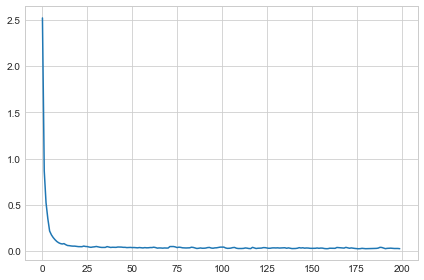

In [26]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();